# Tasks
1. Choose a data set you are interested in
2. Select a region by slicing a boundary box
3. Estimate the spatial mean over time
4. Apply the MK Original Test on your time series and discuss the results
5. Create a plot for your data and add the test result to your plot

### Import the models and open a data set
First you need to import all the modules we need and set an alias for each, so you do not need to write their full names every time.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pymannkendall as mk

Open the dataset using xarray and assign the data you are interested in to a new variable.

In [2]:
gleam = xr.open_dataset("data/gleam_europe_monmean_reduced.nc")
sm = gleam["surface_soil_moisture"]
sm

<xarray.DataArray 'surface_soil_moisture' (time: 252, lat: 100, lon: 254)>
[6400800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16 2000-02-15 ... 2020-12-16
  * lon      (lon) float32 -11.38 -11.12 -10.88 -10.62 ... 51.38 51.62 51.88
  * lat      (lat) float32 59.88 59.62 59.38 59.12 ... 35.88 35.62 35.38 35.12
Attributes:
    long_name:  Surface soil moisture
    units:      m3 m-3
    comment:    Soil moisture in the top 0 ... 10cm

### Select the region and take the spatial average
To subset a region you can select multiple cells using xarray's sel() method in combination with the slice() function.
Note that the order of the coordinates is important!

In [4]:
region = sm.sel(lon=slice(9, 10), lat=slice(51, 50))
region

<xarray.DataArray 'surface_soil_moisture' (time: 252, lat: 4, lon: 4)>
array([[[0.39, 0.39, 0.38, 0.4 ],
        [0.41, 0.39, 0.4 , 0.38],
        [0.41, 0.41, 0.41, 0.38],
        [0.4 , 0.41, 0.4 , 0.38]],

       [[0.4 , 0.4 , 0.39, 0.41],
        [0.42, 0.4 , 0.41, 0.39],
        [0.42, 0.42, 0.42, 0.39],
        [0.41, 0.42, 0.41, 0.39]],

       ...,

       [[0.32, 0.3 , 0.29, 0.3 ],
        [0.36, 0.34, 0.32, 0.33],
        [0.36, 0.36, 0.37, 0.34],
        [0.34, 0.36, 0.35, 0.3 ]],

       [[0.33, 0.31, 0.3 , 0.32],
        [0.38, 0.35, 0.36, 0.36],
        [0.37, 0.38, 0.39, 0.36],
        [0.35, 0.38, 0.37, 0.33]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16 2000-02-15 ... 2020-12-16
  * lon      (lon) float32 9.125 9.375 9.625 9.875
  * lat      (lat) float32 50.88 50.62 50.38 50.12
Attributes:
    long_name:  Surface soil moisture
    units:      m3 m-3
    comment:    Soil moisture in the top 0 ... 10cm

You can see we selected a region with 4x4 grid cells.
Calculate the spatial average over time using the ```mean()``` method. By passing the ```axis()``` argument you can specify
which dimension to average. In this case we choose the 'lat' (1) and 'lon' (2) axes to return a time series.

If you are unsure which number refers to which dimension, run ```region.dims``` before.

In [5]:
region_avg = region.mean(axis=(1,2))
region_avg


<xarray.DataArray 'surface_soil_moisture' (time: 252)>
array([0.39624998, 0.40624997, 0.39874998, 0.380625  , 0.36625   ,
       0.34562498, 0.3775    , 0.36812502, 0.38      , 0.385     ,
       0.39374998, 0.395625  , 0.40437496, 0.40124997, 0.40874997,
       0.39374998, 0.3725    , 0.366875  , 0.35500002, 0.34249997,
       0.374375  , 0.37625   , 0.393125  , 0.40187496, 0.39749998,
       0.41749996, 0.39499998, 0.378125  , 0.393125  , 0.375     ,
       0.366875  , 0.36812502, 0.361875  , 0.39374998, 0.40624997,
       0.405625  , 0.393125  , 0.37312502, 0.3825    , 0.36625   ,
       0.36375   , 0.33874997, 0.31687498, 0.27749997, 0.291875  ,
       0.31937498, 0.33749998, 0.35500002, 0.37062502, 0.37062502,
       0.3675    , 0.3625    , 0.36      , 0.340625  , 0.346875  ,
       0.340625  , 0.343125  , 0.350625  , 0.36812502, 0.37062502,
       0.38437498, 0.383125  , 0.37625   , 0.38375   , 0.37625   ,
       0.350625  , 0.34249997, 0.3425    , 0.33874997, 0.34875   ,
       0.36374998, 0.37312502, 0.36875   , 0.378125  , 0.38125   ,
       0.385     , 0.37687498, 0.35812503, 0.33624998, 0.343125  ,
       0.33374998, 0.35750002, 0.371875  , 0.378125  , 0.39937496,
       0.398125  , 0.39937496, 0.365     , 0.3675    , 0.37      ,
       0.37      , 0.35500002, 0.37375   , 0.371875  , 0.39749998,
       0.398125  , 0.39499998, 0.395625  , 0.395625  , 0.3875    ,
...
       0.39749998, 0.39187497, 0.39374998, 0.369375  , 0.37687498,
       0.38625   , 0.374375  , 0.35562503, 0.34124997, 0.35625002,
       0.375     , 0.390625  , 0.39      , 0.393125  , 0.39374998,
       0.38187498, 0.35625002, 0.375625  , 0.359375  , 0.36625   ,
       0.36375   , 0.364375  , 0.371875  , 0.37687498, 0.39249998,
       0.39687496, 0.38      , 0.380625  , 0.36124998, 0.323125  ,
       0.320625  , 0.32125   , 0.32187498, 0.338125  , 0.335625  ,
       0.35750002, 0.37687498, 0.3875    , 0.398125  , 0.38375   ,
       0.38375   , 0.35750002, 0.37312502, 0.358125  , 0.34687498,
       0.338125  , 0.35      , 0.365     , 0.36      , 0.36062503,
       0.374375  , 0.38437498, 0.353125  , 0.36875   , 0.34812498,
       0.365     , 0.364375  , 0.35875   , 0.37375   , 0.385     ,
       0.39374998, 0.405625  , 0.38125   , 0.37875   , 0.375     ,
       0.33749998, 0.32937497, 0.29562503, 0.28562498, 0.295     ,
       0.28687498, 0.311875  , 0.361875  , 0.374375  , 0.366875  ,
       0.38      , 0.359375  , 0.36875   , 0.356875  , 0.32125   ,
       0.31062502, 0.299375  , 0.34562498, 0.36124998, 0.3725    ,
       0.36312503, 0.38875   , 0.36875   , 0.3225    , 0.325     ,
       0.33187497, 0.304375  , 0.306875  , 0.300625  , 0.333125  ,
       0.33374998, 0.3525    ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16 2000-02-15 ... 2020-12-16

### Applying the Mann-Kendall Test
Apply the Mann-Kendall Test on your time series and assign it to a new variable.
Since our data has seasonality, and the time steps are monthly, we use the Seasonal MK-Test and set the period to 12.

In [6]:
results = mk.seasonal_test(region_avg, period=12)
results

Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=3.5210969251409097e-08, z=-5.513328721124322, Tau=-0.2511904761904762, s=-633.0, var_s=13140.333333333332, slope=-0.001064338403589585, intercept=0.3798812117646722)

We can reject the Null-Hypothesis.
The Mann-Kendall Test shows a decreasing trend for the variable soil moisture with a very high significance (p < 0.0001).

### Visualising the results
The last task is to visualize the time series using matplotlib.pyplot and add the results of the MK-Test to the plot.

<xarray.DataArray 'time' (time: 252)>
array(['2000-01-16T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-16T00:00:00.000000000', ..., '2020-10-16T00:00:00.000000000',
       '2020-11-15T12:00:00.000000000', '2020-12-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-16 2000-02-15 ... 2020-12-16
Attributes:
    standard_name:  time
    long_name:      time coordinate
    axis:           T


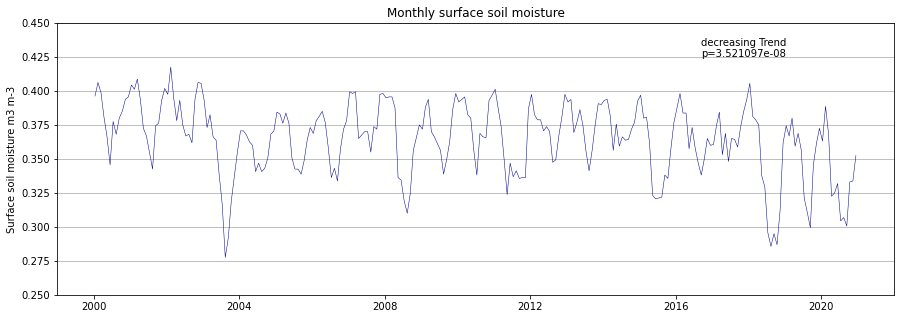

In [7]:
print(region_avg.time)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(region_avg.time, region_avg.values, linestyle='-', linewidth=0.5, color='darkblue')
ax.set_title("Monthly surface soil moisture")
ax.set_ylabel("Surface soil moisture m3 m-3")
ax.set_ylim(0.25, 0.45)
ax.text(region_avg.time[200], 0.425, s=f"{results.trend} Trend \np={results.p:e}")
ax.grid(axis='y')
plt.show()
